<a href="https://colab.research.google.com/github/ashrafulwork/TrafficVisionBD/blob/main/TrafficVisionBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#First we need to setup our envrionment before we even start training our model

Installing kaggle

In [1]:
!pip install kaggle

Uploading kaggle.json file ( make sure to upload your own json file)

In [2]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"mdashrafulhossain","key":"2e9580bff8453309162e28b9d2e05ca9"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Here we passed the dataset path/link

In [4]:
!kaggle datasets download -d hasibzunair/rsud20k-bangladesh-road-scene-understanding # Replace 'datasetname' with your dataset's identifier


Dataset URL: https://www.kaggle.com/datasets/hasibzunair/rsud20k-bangladesh-road-scene-understanding
License(s): Attribution-NonCommercial 4.0 International (CC BY-NC 4.0)
rsud20k-bangladesh-road-scene-understanding.zip: Skipping, found more recently modified local copy (use --force to force download)


The dataset is now uploaded as a ZIP file. Now we need to upload/extract the zip file

In [5]:
import zipfile
import os

# Assuming the dataset is in a single zip file, e.g., 'datasetname.zip'
with zipfile.ZipFile("rsud20k-bangladesh-road-scene-understanding.zip", 'r') as zip_ref:
    zip_ref.extractall("path/to/extract")  # Replace with your preferred directory


Now let us see some samples of our dataset

Found 20334 images belonging to 3 classes.


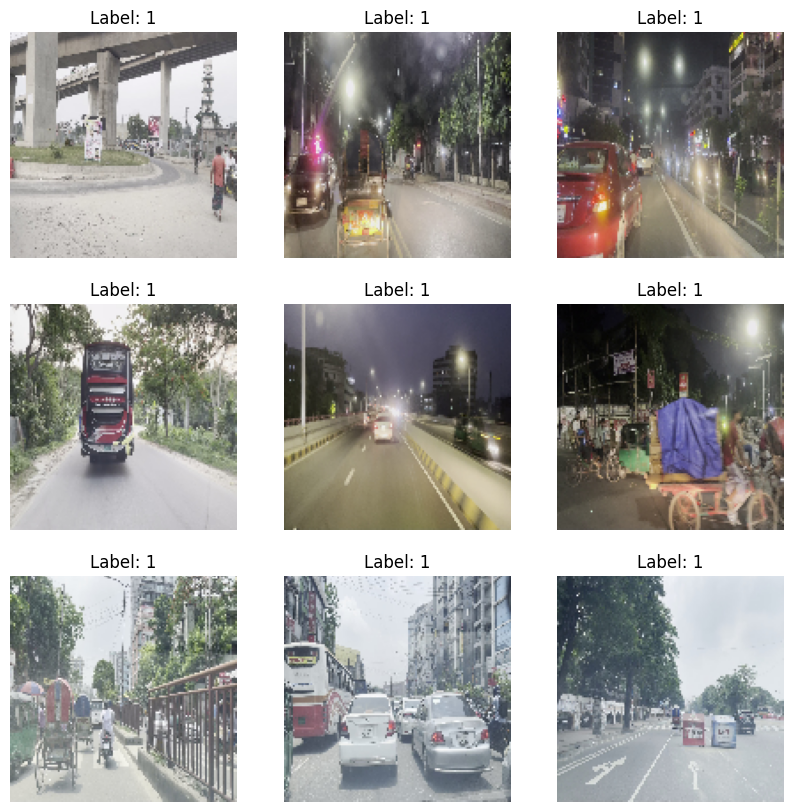

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Set up ImageDataGenerator to load images with labels
data_dir = '/content/path/to/extract/rsud20k'  # Replace with the path where images are extracted

# Load images directly from the directory
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0 / 255)
data = datagen.flow_from_directory(
    data_dir,
    target_size=(128, 128),  # Resize images to 128x128 (adjust as needed)
    batch_size=32,
    class_mode='binary'  # Change to 'categorical' if you have more than 2 classes
)

# Display a batch of images
def show_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Display 9 images
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Label: {int(labels[i])}")
        plt.axis("off")
    plt.show()

# Get a batch of images and labels
images, labels = next(data)
show_images(images, labels)


In [7]:
plt.show()

In [8]:
!pip install yolov5
from yolov5 import YOLOv5
yolo = YOLOv5("yolov5s.pt")  # load a pre-trained YOLO model


In [9]:
!pip install yolov10



In [1]:
from ultralytics import YOLO
model = YOLO('yolov10n.pt')

In [2]:
results = model(source = "/content/o.mp4", show =True, conf =0.4, save = True)


WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/406) /content/o.mp4: 384x640 1 bus, 223.3ms
video 1/1 (frame 2/406) /content/o.mp4: 384x640 1 bus, 1 truck, 194.6ms
video 1/1 (frame 3/406) /content/o.mp4: 384x640 1 bus, 184.8ms
video 1/1 (frame 4/406) /content/o.mp4: 384x640 1 person, 1 car, 1 motorcycle, 1 bus, 214.1ms
video 1/1 (frame 5/406) /content/o.mp4: 384x640 1 person, 1 car, 1 motorcycle, 1 bus, 1 tr

In [ ]:
results = model(source = "/content/image.png", show =True, conf =0.4, save = True)


In [ ]:
dataset = "/content/path/to/extract/rsud20k/images/train"

In [ ]:
!pip install ultralytics

In [ ]:
!yolo predict model="/content/yolov8n.pt" source = "/content/path/to/extract/rsud20k/images/train/train10004.jpg"

In [ ]:
!yolo predict model="/content/yolov8n.pt" source = "/content/path/to/extract/rsud20k/images/train/train10004.jpg"

In [ ]:
!yolo task=segment mode=predict model="/content/yolov8n-seg.pt" source = "/content/path/to/extract/rsud20k/images/train/train10015.jpg"